                                                                                               Nom : AIT SAADA Mira

## Rank One SVD

L'objectif de ce travail est d'appliquer l'algorithme Rank One SVD sur des matrices sparces afin de mieux les visualiser. Cette méthode nous permet de réordonner à la fois les lignes et les colonnes afin de visualiser les éléments de façon plus groupée.

Le principe de la méthode Rank One SVD est d'approximer le vecteur propre associé à la plus grande valeur propre de la matrice stochatistique (calculée à partir de la matrice d'origine). Le vecteur propre en question étant composé de valeurs égales, la notion d'approximation a donc toute son importance. En effet, afin de pouvoir réordonner les lignes et les colonnes, il faut arrêter l'algorithme avant sa convergence vers la valeur exacte du vecteur propre. Pour cela, il suffit d'adapter le critère d'arrêt afin d'avoir une visualisation optimale.

Ce notebook présente la fonction svd_1d complétée et appliquée à 5 matrices sparses.

In [120]:
import numpy as np
from numpy.linalg import norm
from random import normalvariate
from math import sqrt
from scipy.io import loadmat
import matplotlib.pylab as plt
import pandas as pd

In [121]:
def randomUnitVector(n):
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]

In [122]:
def svd_1d(X, epsilon=1e-10):
    A = np.array(X)
    
    n, m = A.shape
    
    # Transformation de A en en matrice stochastique X de dimension (n+m) * (n+m)
    Dr = np.diag(A.sum(axis=1))
    Dc = np.diag(A.sum(axis=0))
    
    Dc_1 = np.linalg.inv(Dc)
    Dr_1 = np.linalg.inv(Dr)
    
    col1 = np.concatenate([np.zeros((n,n)), np.dot(Dc_1 , A.T)])
    col2 = np.concatenate([np.dot(Dr_1 , A), np.zeros((m,m))])
    
    S = np.concatenate([col1, col2], axis=1)
    
    # initialisation du vecteur currentV
    x = randomUnitVector(n+m)
    lastV = None
    currentV = x
    
    lastE = np.linalg.norm(currentV)

    # Itérations 
    iterations = 0
    while True:
        iterations += 1
        lastV = np.array(currentV)
        currentV = np.dot(S, lastV)
        currentV = currentV / norm(currentV)
        
        last_u = lastV[list(range(0,n))]
        last_v = lastV[list(range(n,n+m))]
        
        current_u = currentV[list(range(0,n))]
        current_v = currentV[list(range(n,n+m))]
        
        e_u = np.linalg.norm(current_u - last_u)
        e_v = np.linalg.norm(current_v - last_v)
        
        currentE = e_u + e_v
        
        d = abs(currentE - lastE)
        lastE = currentE
        
        if d <= epsilon:
            print("converged in {} iterations!".format(iterations))

            #u = currentV[range(0,n)]
            #v = currentV[range(n,n+m)]
            
            return current_u, current_v

In [123]:
def reorder(X, u, v):
    """
        return reordered rows and columns of X with respect to u and v
    """
    sort_u = u.argsort()
    sort_v = v.argsort()

    reordered_X = X[:, sort_v]
    reordered_X = reordered_X[sort_u, :]
    
    return reordered_X

# Townships data :

In [124]:
X = np.array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                 [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

columns=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]
index=["HighSchool", "AgricultCoop", "Railstation", "OneRoomSchool", "Veterinary", "NoDoctor", "NoWaterSupply",  "PoliceStation", "LandReallocation"]

pd.DataFrame(X, columns=columns, index = index)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
HighSchool,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
AgricultCoop,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0
Railstation,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
OneRoomSchool,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1
Veterinary,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0
NoDoctor,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1
NoWaterSupply,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
PoliceStation,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
LandReallocation,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0


In [125]:
u, v = svd_1d(X, 1e-5)

sort_u = u.argsort()
sort_v = v.argsort()

columns=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]
columns = np.array(columns)
columns = columns[sort_v]

index=["HighSchool", "AgricultCoop", "Railstation", "OneRoomSchool", "Veterinary", "NoDoctor", "NoWaterSupply",  "PoliceStation", "LandReallocation"]
index = np.array(index)
index = index[sort_u]

reordered_X = reorder(X, u, v)

pd.DataFrame(reordered_X, index = index, columns = columns)

converged in 11 iterations!


,H,K,I,J,M,N,A,E,F,P,B,C,D,G,L,O
AgricultCoop,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
Veterinary,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
LandReallocation,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
OneRoomSchool,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0
NoDoctor,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0
NoWaterSupply,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
HighSchool,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Railstation,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PoliceStation,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


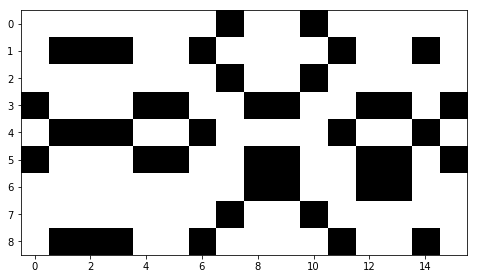

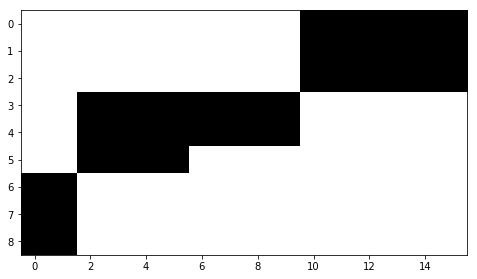

In [126]:
plt.figure(figsize = (8,4.5))
plt.imshow(X, cmap='binary', aspect='auto')
plt.show()

plt.figure(figsize = (8,4.5))
plt.imshow(reordered_X, cmap='binary', aspect='auto')
plt.show()

Le résultat est visible sur un petit jeu de données binaires. Les valeurs à 1 sont rassemblées en 3 blocs.

# CSTR Dataset

In [165]:
mat = loadmat("data/cstr.mat")
X = mat["fea"]

X.shape

(475, 1000)

In [168]:
u, v = svd_1d(X, 1e-5)
reordered_X = reorder(X, u, v)

converged in 61 iterations!


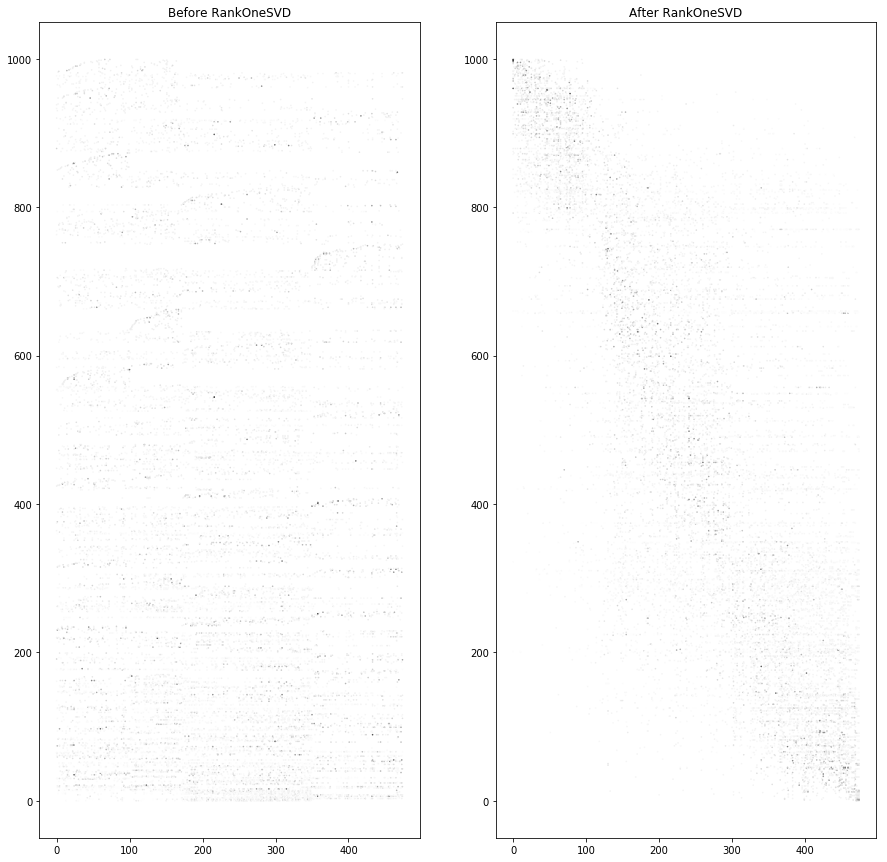

In [169]:
x, y = X.nonzero()
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.scatter(x,y, s=0.3, c=X[x,y], cmap = "binary")
plt.title("Before RankOneSVD")

x, y = reordered_X.nonzero()
plt.subplot(1,2,2)
plt.scatter(x,y, s=0.3, c=reordered_X[x,y], cmap = "binary")
plt.title("After RankOneSVD")
plt.show()

Sur une matrice plus grande et à valeurs non binaires, la séparation est moins nette. On distingue néanmoins que les plus grandes valeurs ont tendance à être rassemblées en diagonale. On peut également distinguer trois groupes plus ou moins séparés.

# Classic300 Dataset

In [155]:
mat = loadmat("data/classic300.mat")
X = mat["dtm"].toarray()
X.shape

(300, 5577)

In [156]:
u, v = svd_1d(X, 1e-5)
reordered_X = reorder(X, u, v)

converged in 39 iterations!


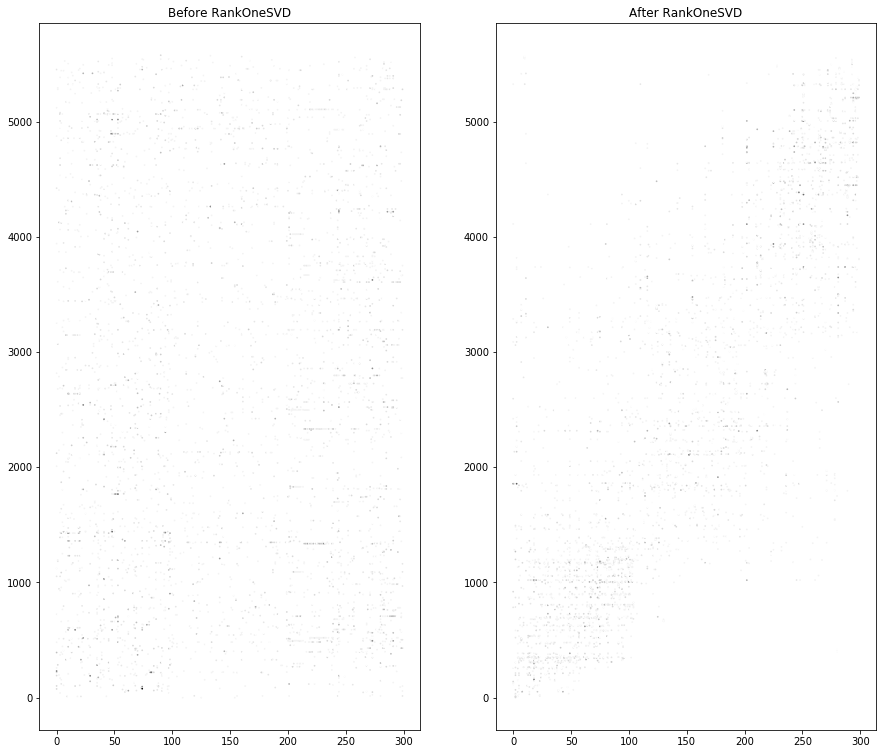

In [136]:
x, y = X.nonzero()
plt.figure(figsize = (15,13))
plt.subplot(1,2,1)
plt.scatter(x,y, s=0.5, c=X[x,y], cmap = "binary")
plt.title("Before RankOneSVD")

x, y = reordered_X.nonzero()
plt.subplot(1,2,2)
plt.scatter(x,y, s=0.5, c=reordered_X[x,y], cmap = "binary")
plt.title("After RankOneSVD")
plt.show()

Ici également, les valeurs non-nulles ont tendance à être agrégée au niveau de la diagonale pour former des groupes plus ou moins distincts.

# Classic30 Dataset

In [140]:
mat = loadmat("data/classic30.mat")
X = mat["dtm"].toarray()

X.shape

(30, 1073)

In [141]:
u, v = svd_1d(X, 1e-6)
reordered_X = reorder(X, u, v)

converged in 94 iterations!


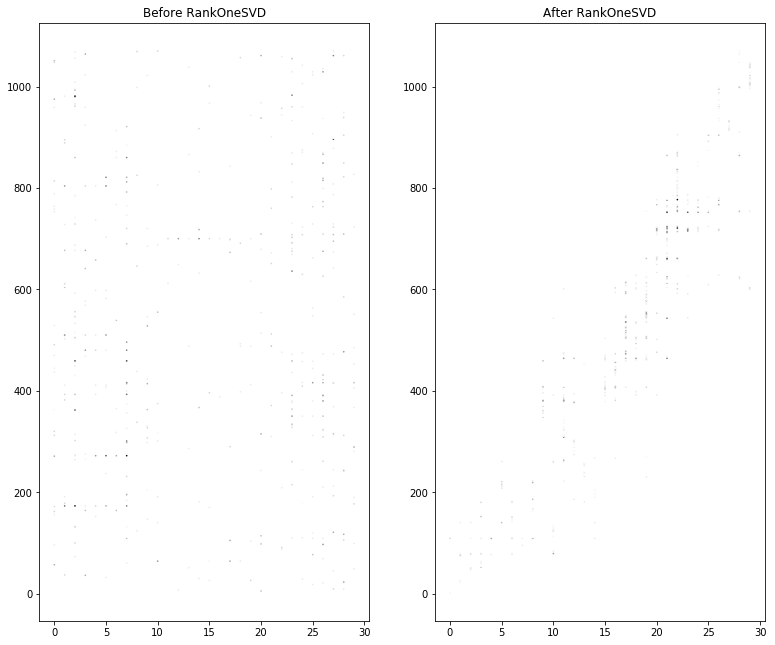

In [142]:
x, y = X.nonzero()
plt.figure(figsize = (13,11))
plt.subplot(1,2,1)
plt.scatter(x,y, s=0.4, c=X[x,y], cmap = "binary")
plt.title("Before RankOneSVD")

x, y = reordered_X.nonzero()
plt.subplot(1,2,2)
plt.scatter(x,y, s=0.4, c=reordered_X[x,y], cmap = "binary")
plt.title("After RankOneSVD")
plt.show()

Ici également, les points sont rassemblées sur la diagonale (de la droite vers la gauche). En revanche, on distingue moins les groupes.

# Classic3 Dataset

In [152]:
mat = loadmat("data/classic3.mat")
X = mat["A"].toarray()

X.shape

(3891, 4303)

In [153]:
u, v = svd_1d(X, 1e-5)
reordered_X = reorder(X, u, v)

converged in 20 iterations!


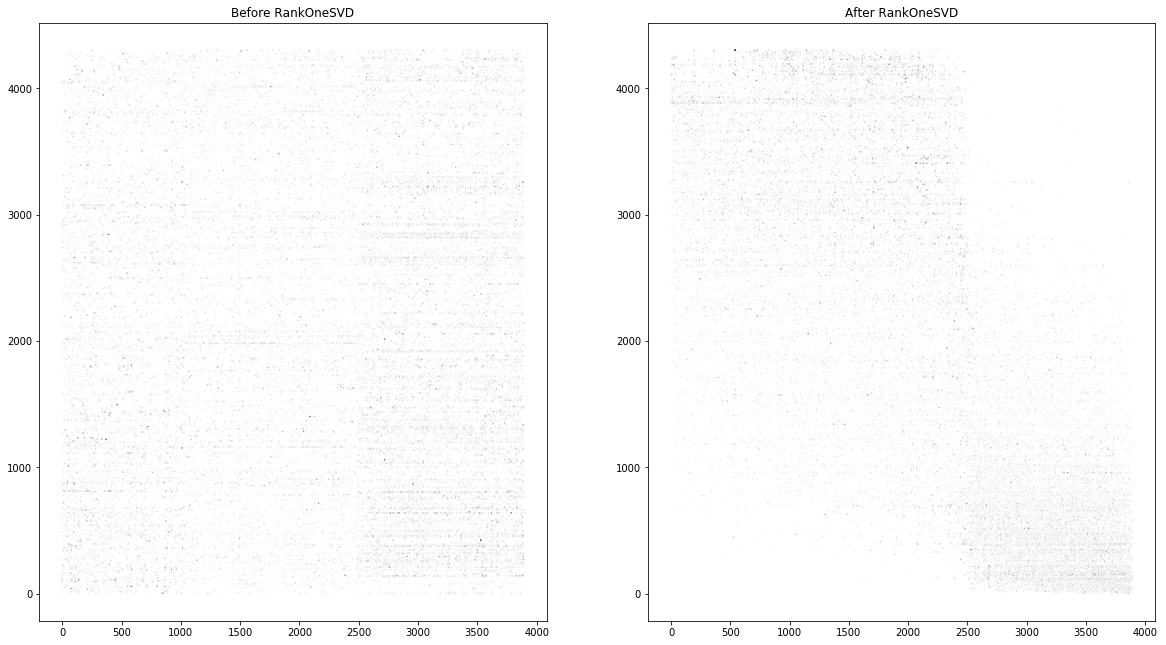

In [154]:
x, y = X.nonzero()
plt.figure(figsize = (20,11))
plt.subplot(1,2,1)
plt.scatter(x,y, s=0.5, c=X[x,y], cmap = "binary")
plt.title("Before RankOneSVD")

x, y = reordered_X.nonzero()
plt.subplot(1,2,2)
plt.scatter(x,y, s=0.5, c=reordered_X[x,y], cmap = "binary")
plt.title("After RankOneSVD")
plt.show()

Sur cette matrice carrée, les éléments apparaissent plus séparés en colonne qu'en ligne. La séparation est moins nette en ligne mais on distingue néanmoins un dégradé au long des lignes (descendant à gauche et ascendant à droite)

# Conclusion

Le Rank One SVD est une manière efficace de réordonner les lignes et colonnes d'une matrice afin d'en faciliter la visualisation. Dans la plupart des cas, les points sont rassembés en colonne et forment, dans certains cas, des classes bien distinctes. C'est pour cela que la méthode présente un potentiel pour la classification et notamment la bi-classification.